In [1]:
%matplotlib inline
from timeit import default_timer as timer
import py_mpwp as pwp
import py_mpwp_utils as utils

/opt/tljh/user/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# Plot forcing fields

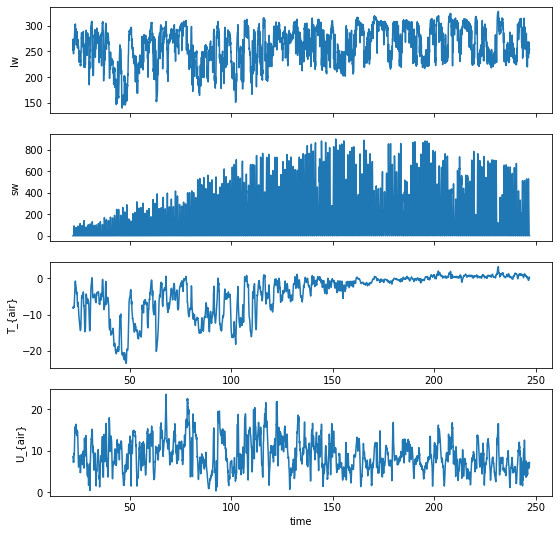

In [2]:
utils.plot_forcings(fname='output_forcings.nc',name_fig='forcings.png')

# Run the model

In [3]:
# run with default parameters
start = timer()
my_model = pwp.py_mpwp_model()
my_model.run()
end = timer()
print('time={:g}'.format(end - start))

100%|███████████████████████████████████| 16200/16200 [00:13<00:00, 1227.58it/s]

time=13.7653


# Plot outputs

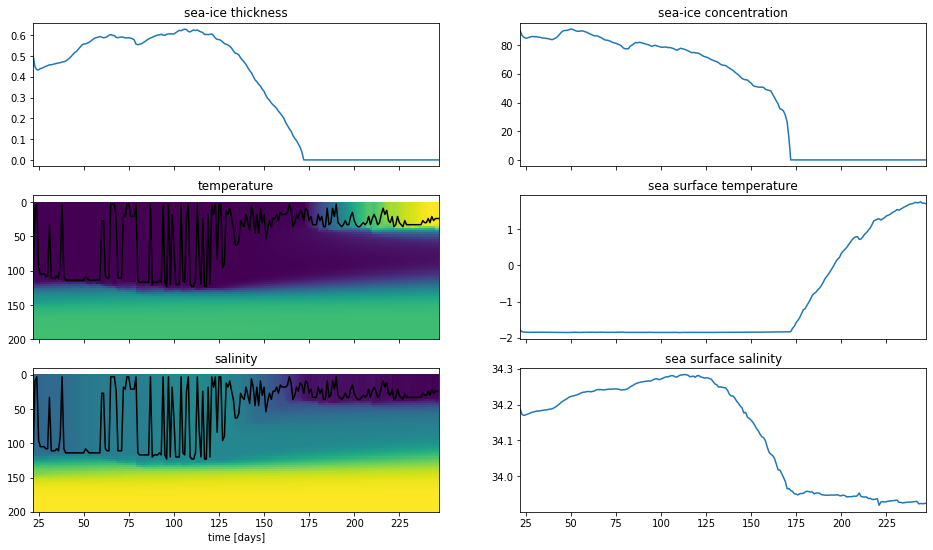

In [4]:
utils.plot_TS_section(fname='output.nc',name_fig='section.png')

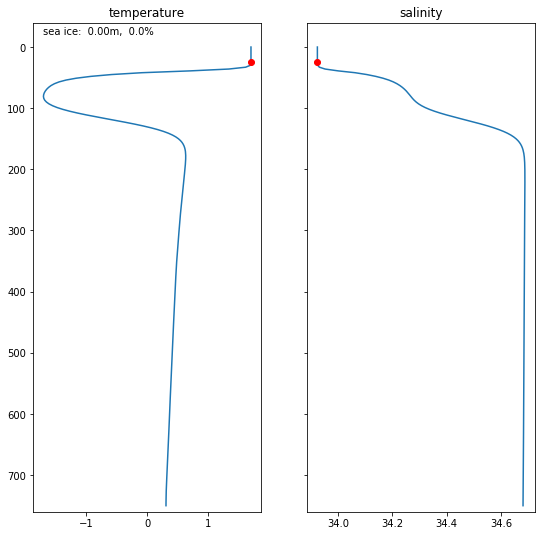

In [5]:
utils.extract_state(fname='output.nc',name_state_file='init_state.nc',niter=0)
utils.extract_state(fname='output.nc',name_state_file='final_state.nc',niter=-1)
utils.plot_state(fname='output.nc',name_fig='profile_TS.png',niter=-1)

# Run with modified parameters

In [6]:
# add parameters as arguments
# Argument names must be listed in py_mpwp_default_params.py
start = timer()
my_model = pwp.py_mpwp_model(equation_of_state='linear',w_ekman=0,kappa=1e-4,\
                             output_file='output_modified_parameters.nc',\
                             log_file='log_modified_parameters.txt')
my_model.run()
end = timer()
print('time={:g}'.format(end - start))

100%|███████████████████████████████████| 16200/16200 [00:07<00:00, 2277.38it/s]

time=7.13662


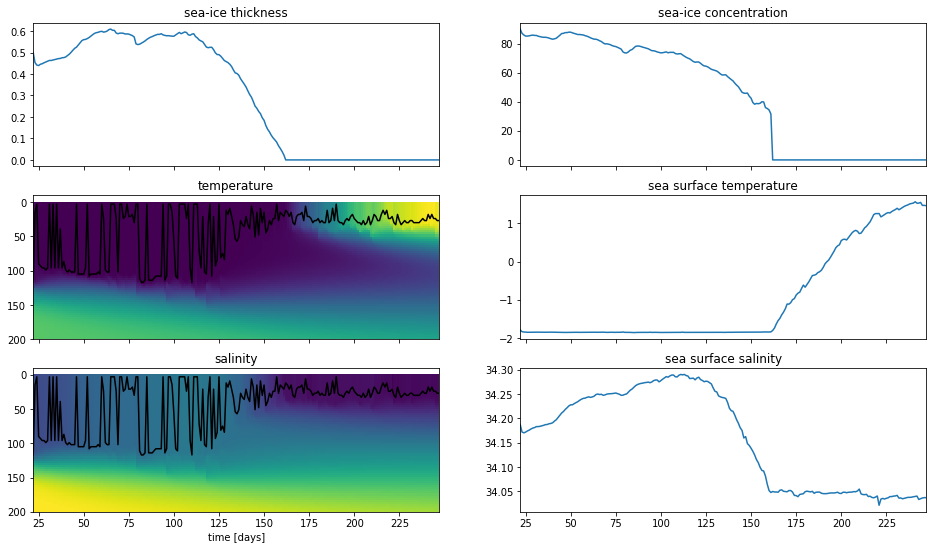

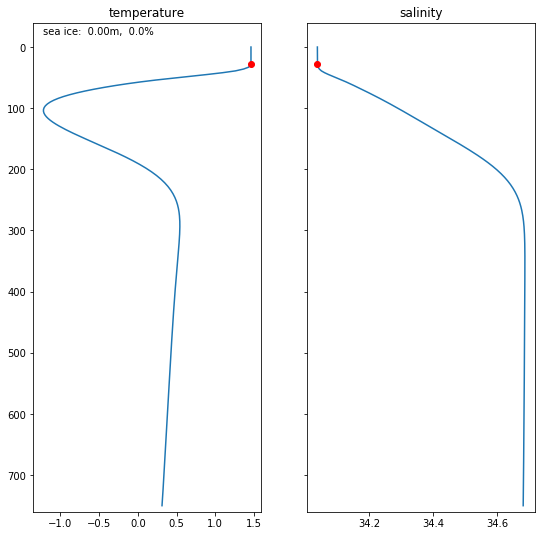

In [7]:
utils.plot_TS_section(fname='output_modified_parameters.nc',name_fig='section_modified_parameters.png')
utils.plot_state(fname='output_modified_parameters.nc',name_fig='profile_TS_modified_parameters.png',niter=-1)